In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score

tf.random.set_seed(42)


import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

np.random.seed(42)

file_path = '/content/drive/My Drive/an-ninh-mang/dataset/UNSW-NB15/UNSW_NB15_training-set.csv'
df_train = pd.read_csv(file_path)

file_path = '/content/drive/My Drive/an-ninh-mang/dataset/UNSW-NB15/UNSW_NB15_testing-set.csv'
df_test = pd.read_csv(file_path)

df_train['Data_Type'] = 1
df_test['Data_Type'] = 0

df = pd.concat([df_train, df_test], ignore_index=True)

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,Data_Type
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,0,0,0,1,1,0,Normal,0,1
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,2,0,0,0,1,6,0,Normal,0,1
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,3,0,0,0,2,6,0,Normal,0,1
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,3,1,1,0,2,1,0,Normal,0,1
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,40,0,0,0,2,39,0,Normal,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,2,0,0,0,2,1,0,Normal,0,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,0,0,0,3,2,0,Normal,0,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,0,0,0,1,1,1,Normal,0,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,0,0,0,1,1,1,Normal,0,0


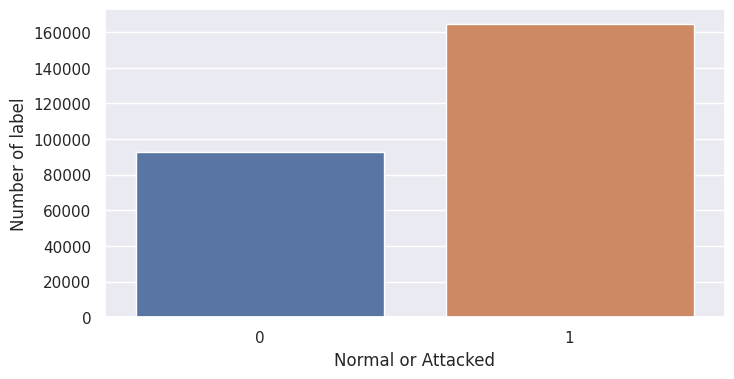

In [30]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(8, 4)})
plt.xlabel('Status')
sns.set_theme()
ax = sns.countplot(x='label', data=df)
ax.set(xlabel='Normal or Attacked', ylabel='Number of label')
plt.show()

In [31]:
list_drop = ['attack_cat', 'id']
df.drop(list_drop,axis=1,inplace=True)

In [32]:
df.shape

(257673, 44)

# **Encoding the categorical data - OneHot Encoding**



In [33]:
data_cat = df.select_dtypes(exclude=[np.number])
data_cat.describe(include='all')

,proto,service,state
count,257673,257673,257673
unique,133,13,11
top,tcp,-,FIN
freq,123041,141321,117164


In [34]:
columns_to_encode = data_cat.columns
last_two_columns = df.iloc[:, -2:]
df = df.iloc[:, :-2]

one_hot_encoded = pd.get_dummies(df, columns=columns_to_encode)
df = pd.concat([one_hot_encoded, last_two_columns], axis=1)


In [35]:
df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,label,Data_Type
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,1,0,0,0,0,0,0,0,1
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,1,0,0,0,0,0,0,0,1
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,1,0,0,0,0,0,0,0,1
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,1,0,0,0,0,0,0,0,1
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,1,0,0,0,0,0,0,0
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,1,0,0,0,0,0,0,0,0
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0


In [36]:
df.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **Fillna**

In [37]:
import warnings
warnings.filterwarnings('ignore')

df2 = df.copy()

In [38]:
df2.fillna(df2.mean(), inplace=True)
print(df2.isna().sum().to_numpy())

df2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,label,Data_Type
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,1,0,0,0,0,0,0,0,1
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,1,0,0,0,0,0,0,0,1
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,1,0,0,0,0,0,0,0,1
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,1,0,0,0,0,0,0,0,1
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,...,0,0,1,0,0,0,0,0,0,0
257669,1.106101,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,...,0,1,0,0,0,0,0,0,0,0
257670,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0
257671,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,...,0,0,1,0,0,0,0,0,0,0


# **Test**


In [39]:
std_deviation = df2.iloc[:, :-2].std(ddof=0)

rank_dict = {}

for column, std in std_deviation.items():
    rank_dict[column] = std

rank_dict = dict(sorted(rank_dict.items(), key=lambda item: item[1], reverse=True))

for feature, rank in rank_dict.items():
    print(f"{feature}: {rank} RANK {list(rank_dict.keys()).index(feature) + 1}")

stcpb: 1367791915.4939208 RANK 1
dtcpb: 1363874445.891279 RANK 2
sload: 185730892.44030616 RANK 3
dload: 2412367.457089753 RANK 4
sbytes: 173773.5434061105 RANK 5
rate: 160344.3255531934 RANK 6
dbytes: 146198.99824660041 RANK 7
response_body_len: 49625.13742979475 RANK 8
sjit: 49034.4012891827 RANK 9
sinpkt: 6922.139807356006 RANK 10
djit: 3930.1457424387963 RANK 11
dinpkt: 1094.046568247368 RANK 12
dmean: 254.04052026118842 RANK 13
smean: 205.90071816737034 RANK 14
spkts: 135.94688847907395 RANK 15
swin: 127.36719546836578 RANK 16
dwin: 127.23023008308296 RANK 17
dttl: 112.76191253743595 RANK 18
dpkts: 111.98574792832872 RANK 19
sttl: 102.48806914469716 RANK 20
sloss: 65.57482613473884 RANK 21
dloss: 53.70211778599242 RANK 22
ct_dst_src_ltm: 11.12073289143279 RANK 23
ct_srv_dst: 10.874730739271824 RANK 24
ct_srv_src: 10.829684796560647 RANK 25
ct_src_ltm: 8.396249911011994 RANK 26
ct_dst_ltm: 8.173733353529357 RANK 27
ct_src_dport_ltm: 8.160806054276714 RANK 28
dur: 5.9742938117282245

In [40]:
# mean_dict = df2.iloc[:, :-2].mean(axis=0,numeric_only=True,skipna=True)
# median_dict = df2.iloc[:, :-2].median()

# difference_dict = {col: abs(mean_dict[col] - median_dict[col]) for col in df2.columns if col != 'label' and col != 'Data_Type'}

# difference_dict = dict(sorted(difference_dict.items(), key=lambda item: item[1], reverse=True))

# for feature, difference in difference_dict.items():
#     print(f"{feature}: Mean = {mean_dict[feature]}, Median = {median_dict[feature]}, Difference = {difference} RANK: {list(difference_dict.keys()).index(feature) + 1}")

In [41]:
# combined_rank_dict = {}

# for feature in rank_dict.keys():
#     rank_std = list(rank_dict.keys()).index(feature) + 1
#     rank_diff = list(difference_dict.keys()).index(feature) + 1

#     combined_rank = rank_std + rank_diff

#     combined_rank_dict[feature] = combined_rank

# combined_rank_dict = dict(sorted(combined_rank_dict.items(), key=lambda item: item[1]))

# for feature, combined_rank in combined_rank_dict.items():
#     print(f"{feature}: Combined Rank = {combined_rank}")


# **Feature scaling - Standard Scaler**

In [42]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df2.columns[:-2]
sta = StandardScaler()
df2[columns_to_scale] = sta.fit_transform(df2[columns_to_scale])

df2

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,label,Data_Type
0,-0.188346,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,1.500906,-0.380090,-0.269328,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
1,-0.099897,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,1.483170,-0.380121,-0.064104,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
2,0.063006,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,1.483170,-0.380158,-0.247593,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
3,0.072800,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,1.483170,-0.380152,-0.271458,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
4,-0.133449,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,1.483170,-0.380121,-0.271197,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-0.208679,-0.130765,-0.165331,-0.048736,-0.098409,0.678204,0.722026,-0.751628,0.067793,-0.272850,...,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0
257669,-0.023537,0.001639,-0.093893,0.054606,-0.095988,-0.568960,0.722026,1.483170,-0.379498,-0.271921,...,-0.006824,1.095103,-0.907980,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0
257670,-0.208680,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,-1.756311,-0.751628,-0.380167,-0.272850,...,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0
257671,-0.208680,-0.138121,-0.165331,-0.049069,-0.098409,-0.569112,-1.756311,-0.751628,-0.380167,-0.272850,...,-0.006824,-0.913156,1.101346,-0.00197,-0.122882,-0.018058,-0.00197,-0.00197,0,0


In [43]:
print(df['label'].value_counts())

1    164673
0     93000
Name: label, dtype: int64


In [44]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# columns_to_scale = df.columns[:-1]
# df2[columns_to_scale] = mm.fit_transform(df2[columns_to_scale])
# df2

# **Rank**

In [45]:
# std_deviation = df2.iloc[:, :-2].std(ddof=0)

# rank_dict = {}

# for column, std in std_deviation.items():
#     rank_dict[column] = std

# rank_dict = dict(sorted(rank_dict.items(), key=lambda item: item[1], reverse=True))

# for feature, rank in rank_dict.items():
#     print(f"{feature}: {rank} RANK {list(rank_dict.keys()).index(feature) + 1}")

In [46]:
mean_dict = df2.iloc[:, :-2].mean(axis=0,numeric_only=True,skipna=True)
median_dict = df2.iloc[:, :-2].median()

difference_dict = {col: abs(mean_dict[col] - median_dict[col]) for col in df2.columns if col != 'label' and col != 'Data_Type'}

difference_dict = dict(sorted(difference_dict.items(), key=lambda item: item[1], reverse=True))

for feature, difference in difference_dict.items():
    print(f"{feature}: Mean = {mean_dict[feature]}, Median = {median_dict[feature]}, Difference = {difference} RANK: {list(difference_dict.keys()).index(feature) + 1}")

proto_tcp: Mean = 3.5296468849003516e-18, Median = -0.9559843382734183, Difference = 0.9559843382734183 RANK: 1
swin: Mean = 3.176682196410316e-17, Median = -0.9559263686358682, Difference = 0.9559263686358682 RANK: 2
dwin: Mean = 1.8354163801481827e-16, Median = -0.9373136309746433, Difference = 0.9373136309746435 RANK: 3
state_FIN: Mean = 8.824117212250879e-17, Median = -0.9131560979211533, Difference = 0.9131560979211534 RANK: 4
state_INT: Mean = -3.353164540655334e-17, Median = -0.9079798306230994, Difference = 0.9079798306230994 RANK: 5
service_-: Mean = -2.029546958817702e-17, Median = 0.9073682433770178, Difference = 0.9073682433770178 RANK: 6
proto_udp: Mean = -2.0030746071809494e-16, Median = -0.7496129657878909, Difference = 0.7496129657878907 RANK: 7
stcpb: Mean = -2.6472351636752636e-17, Median = -0.735579972933591, Difference = 0.735579972933591 RANK: 8
dtcpb: Mean = -7.059293769800703e-18, Median = -0.734888028117379, Difference = 0.734888028117379 RANK: 9
sttl: Mean = 2.

In [47]:
combined_rank_dict = {}

for feature in rank_dict.keys():
    rank_std = list(rank_dict.keys()).index(feature) + 1
    rank_diff = list(difference_dict.keys()).index(feature) + 1

    combined_rank = rank_std + rank_diff

    combined_rank_dict[feature] = combined_rank

combined_rank_dict = dict(sorted(combined_rank_dict.items(), key=lambda item: item[1]))

for feature, combined_rank in combined_rank_dict.items():
    print(f"{feature}: Combined Rank = {combined_rank}")


stcpb: Combined Rank = 9
dtcpb: Combined Rank = 11
rate: Combined Rank = 18
swin: Combined Rank = 18
dwin: Combined Rank = 20
sload: Combined Rank = 27
sttl: Combined Rank = 30
dload: Combined Rank = 34
dttl: Combined Rank = 35
proto_tcp: Combined Rank = 35
state_FIN: Combined Rank = 39
dmean: Combined Rank = 41
smean: Combined Rank = 41
state_INT: Combined Rank = 41
ct_dst_src_ltm: Combined Rank = 42
ct_dst_ltm: Combined Rank = 42
ct_src_dport_ltm: Combined Rank = 42
ct_dst_sport_ltm: Combined Rank = 43
service_-: Combined Rank = 43
ct_srv_dst: Combined Rank = 44
proto_udp: Combined Rank = 45
djit: Combined Rank = 46
ct_src_ltm: Combined Rank = 47
ct_srv_src: Combined Rank = 48
sinpkt: Combined Rank = 50
service_dns: Combined Rank = 50
dpkts: Combined Rank = 55
sjit: Combined Rank = 56
dbytes: Combined Rank = 57
ct_state_ttl: Combined Rank = 57
spkts: Combined Rank = 60
sbytes: Combined Rank = 61
dur: Combined Rank = 61
dinpkt: Combined Rank = 63
dloss: Combined Rank = 63
response_bod

# **Splitting the dataset**

In [48]:
train_data = df2[df2['Data_Type'] == 1]
test_data = df2[df2['Data_Type'] == 0]

train_data = train_data.drop('Data_Type', axis=1)
test_data = test_data.drop('Data_Type', axis=1)

In [49]:
test_data.shape

(82332, 197)

In [50]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


# Training

In [51]:
combined_rank_dict = dict(sorted(combined_rank_dict.items(), key=lambda item: item[1]))
top_features = list(combined_rank_dict.keys())[:]

print(len(top_features))
print(top_features)

196
['stcpb', 'dtcpb', 'rate', 'swin', 'dwin', 'sload', 'sttl', 'dload', 'dttl', 'proto_tcp', 'state_FIN', 'dmean', 'smean', 'state_INT', 'ct_dst_src_ltm', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'service_-', 'ct_srv_dst', 'proto_udp', 'djit', 'ct_src_ltm', 'ct_srv_src', 'sinpkt', 'service_dns', 'dpkts', 'sjit', 'dbytes', 'ct_state_ttl', 'spkts', 'sbytes', 'dur', 'dinpkt', 'dloss', 'response_body_len', 'service_http', 'ct_flw_http_mthd', 'tcprtt', 'trans_depth', 'state_CON', 'proto_unas', 'ackdat', 'sloss', 'service_smtp', 'synack', 'service_ftp-data', 'service_ftp', 'proto_arp', 'state_REQ', 'is_sm_ips_ports', 'proto_ospf', 'ct_ftp_cmd', 'is_ftp_login', 'service_pop3', 'service_ssh', 'proto_sctp', 'proto_any', 'proto_gre', 'proto_rsvp', 'proto_ipv6', 'proto_sun-nd', 'proto_pim', 'proto_swipe', 'proto_mobile', 'proto_sep', 'proto_leaf-1', 'proto_prm', 'proto_xns-idp', 'proto_aes-sp3-d', 'proto_aris', 'proto_ax.25', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_com

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support


def count_attack_benign(y_test):
    attack = 0
    benign = 0

    for label in y_test:
        if label == 1:
            attack += 1
        else:
            benign += 1

    print("Malicious data in test set:", attack)
    print("Benign data in test set:", benign)


def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_classification_with_plot(truth, predicted, threshold=0.5, class_names=['Bengin', 'Malicious']):
    predicted_binary = (predicted > threshold).astype(int)

    confusion = confusion_matrix(truth, predicted_binary)
    print("Confusion Matrix:")
    print(confusion)

    count_attack_benign(truth)

    accuracy = accuracy_score(truth, predicted_binary)
    print("Accuracy:", accuracy)

    precision, recall, f1, _ = precision_recall_fscore_support(truth, predicted_binary, average='binary')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    plot_confusion_matrix(confusion, class_names)

    return accuracy




Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.5852 - accuracy: 0.6800 - val_loss: 0.6461 - val_accuracy: 0.5506
Epoch 2/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.5799 - accuracy: 0.6792 - val_loss: 0.6578 - val_accuracy: 0.5506
Epoch 3/10
1370/1370 [==============================] - 5s 3ms/step - loss: 0.5783 - accuracy: 0.6793 - val_loss: 0.6467 - val_accuracy: 0.6121
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.5783 - accuracy: 0.6790 - val_loss: 0.6563 - val_accuracy: 0.5506
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.5779 - accuracy: 0.6786 - val_loss: 0.6480 - val_accuracy: 0.5506
Epoch 6/10
1370/1370 [==============================] - 5s 3ms/step - loss: 0.5774 - accuracy: 0.6782 - val_loss: 0.6564 - val_accuracy: 0.5506
Epoch 7/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.5771 - accuracy: 0.6792 - val_loss: 0.6482 - val_accuracy:

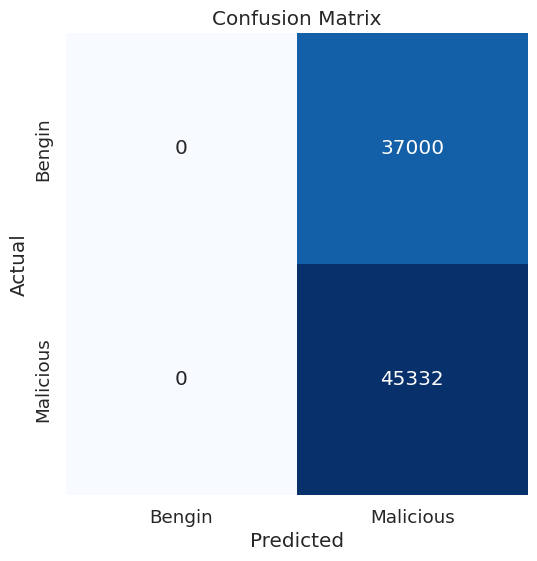

1 features, add feature stcpb => accuracy: 0.5506000097167566
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.5841 - accuracy: 0.6876 - val_loss: 0.6301 - val_accuracy: 0.6333
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.5450 - accuracy: 0.7449 - val_loss: 0.6307 - val_accuracy: 0.6862
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.5137 - accuracy: 0.7849 - val_loss: 0.6247 - val_accuracy: 0.6862
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.4969 - accuracy: 0.7999 - val_loss: 0.6278 - val_accuracy: 0.6859
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.4874 - accuracy: 0.8057 - val_loss: 0.6181 - val_accuracy: 0.6851
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.4801 - accuracy: 0.8087 - val_loss: 0.6

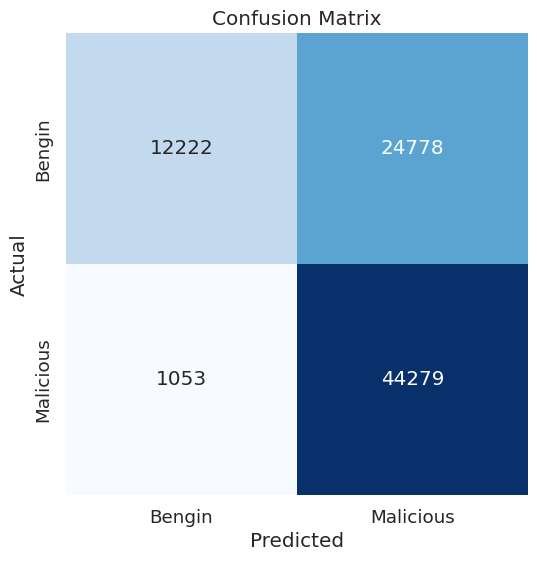

2 features, add feature dtcpb => accuracy: 0.6862580770538794
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.4595 - accuracy: 0.7532 - val_loss: 0.5695 - val_accuracy: 0.7027
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.4078 - accuracy: 0.8171 - val_loss: 0.5657 - val_accuracy: 0.7472
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3834 - accuracy: 0.8416 - val_loss: 0.5632 - val_accuracy: 0.7475
Epoch 4/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.3671 - accuracy: 0.8541 - val_loss: 0.5594 - val_accuracy: 0.7466
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3564 - accuracy: 0.8588 - val_loss: 0.5479 - val_accuracy: 0.7470
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.3478 - accuracy: 0.8625 - val_loss: 0.5

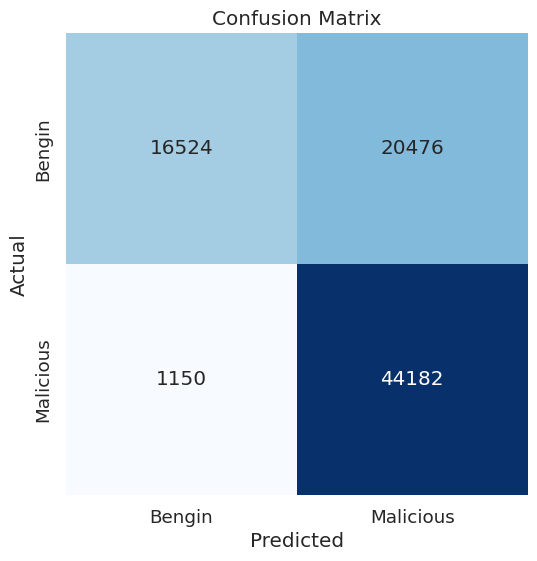

3 features, add feature rate => accuracy: 0.7373317786522858
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.4546 - accuracy: 0.7371 - val_loss: 0.5534 - val_accuracy: 0.6788
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.4253 - accuracy: 0.7888 - val_loss: 0.5337 - val_accuracy: 0.7372
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3814 - accuracy: 0.8402 - val_loss: 0.5177 - val_accuracy: 0.7611
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3614 - accuracy: 0.8560 - val_loss: 0.5249 - val_accuracy: 0.7617
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.3522 - accuracy: 0.8625 - val_loss: 0.5180 - val_accuracy: 0.7615
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3449 - accuracy: 0.8655 - val_loss: 0.52

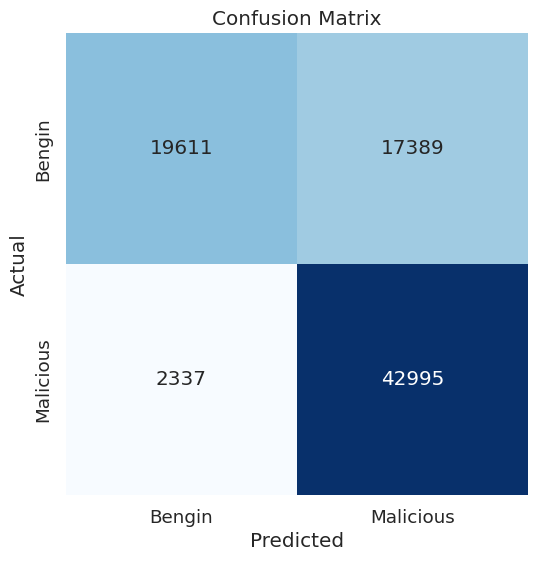

4 features, add feature swin => accuracy: 0.7604090754506145
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 9s 6ms/step - loss: 0.4578 - accuracy: 0.7424 - val_loss: 0.5448 - val_accuracy: 0.7557
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.4163 - accuracy: 0.8047 - val_loss: 0.5328 - val_accuracy: 0.7606
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.3795 - accuracy: 0.8428 - val_loss: 0.5224 - val_accuracy: 0.7619
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3615 - accuracy: 0.8566 - val_loss: 0.5263 - val_accuracy: 0.7612
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3533 - accuracy: 0.8612 - val_loss: 0.5235 - val_accuracy: 0.7619
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.3473 - accuracy: 0.8642 - val_loss: 0.53

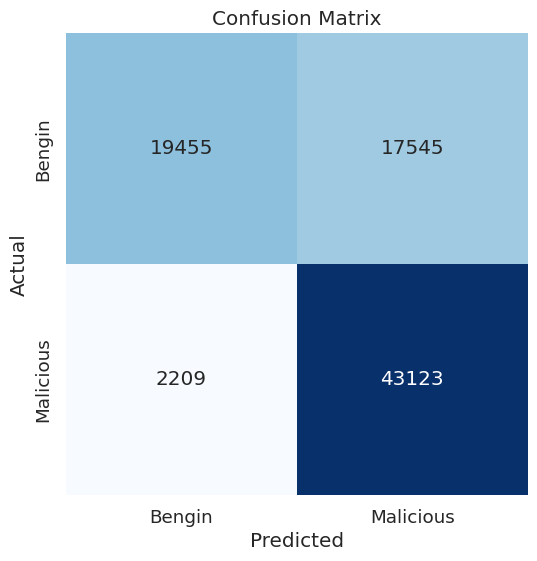

5 features, add feature dwin => accuracy: 0.7600689889714813
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.4465 - accuracy: 0.7331 - val_loss: 0.5219 - val_accuracy: 0.6457
Epoch 2/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.4101 - accuracy: 0.7826 - val_loss: 0.4969 - val_accuracy: 0.7265
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3608 - accuracy: 0.8371 - val_loss: 0.4765 - val_accuracy: 0.7631
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.3402 - accuracy: 0.8531 - val_loss: 0.4619 - val_accuracy: 0.7631
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3297 - accuracy: 0.8591 - val_loss: 0.4645 - val_accuracy: 0.7619
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.3229 - accuracy: 0.8621 - val_loss: 0.45

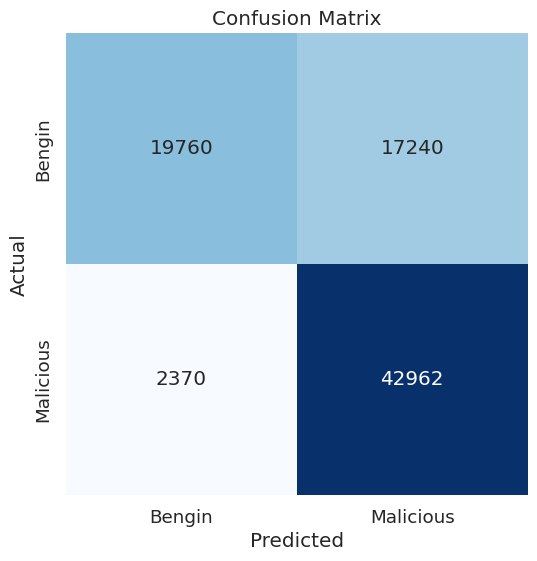

6 features, add feature sload => accuracy: 0.761818005149881
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 4ms/step - loss: 0.2642 - accuracy: 0.9029 - val_loss: 0.4650 - val_accuracy: 0.7845
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.2131 - accuracy: 0.9251 - val_loss: 0.4423 - val_accuracy: 0.7854
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.2056 - accuracy: 0.9255 - val_loss: 0.4269 - val_accuracy: 0.7854
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1999 - accuracy: 0.9256 - val_loss: 0.4200 - val_accuracy: 0.7853
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1947 - accuracy: 0.9254 - val_loss: 0.4053 - val_accuracy: 0.7854
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1915 - accuracy: 0.9255 - val_loss: 0.40

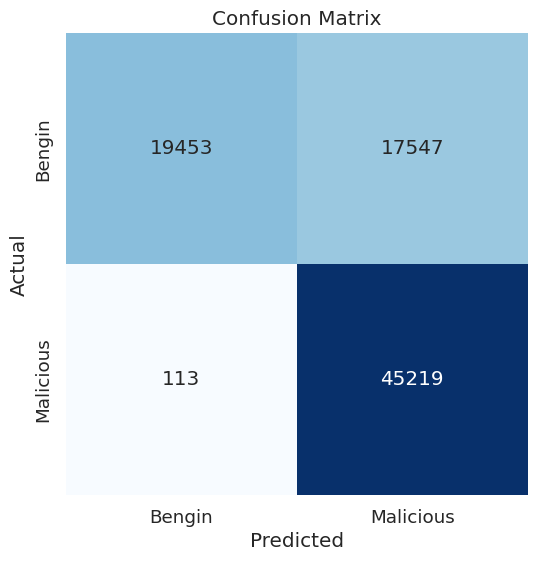

7 features, add feature sttl => accuracy: 0.7855025992323762
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.2624 - accuracy: 0.9029 - val_loss: 0.4575 - val_accuracy: 0.7845
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.2091 - accuracy: 0.9251 - val_loss: 0.4372 - val_accuracy: 0.7855
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.2026 - accuracy: 0.9255 - val_loss: 0.4199 - val_accuracy: 0.7853
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1965 - accuracy: 0.9255 - val_loss: 0.4034 - val_accuracy: 0.7855
Epoch 5/10
1370/1370 [==============================] - 5s 3ms/step - loss: 0.1913 - accuracy: 0.9254 - val_loss: 0.3983 - val_accuracy: 0.7854
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1880 - accuracy: 0.9254 - val_loss: 0.40

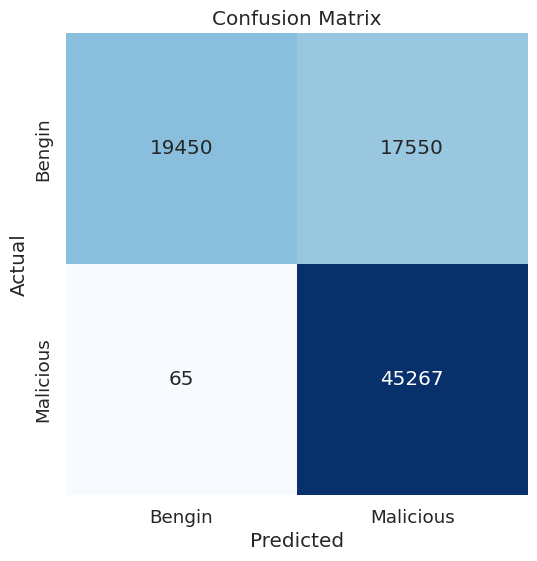

8 features, add feature dload => accuracy: 0.7860491667881261
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.2320 - accuracy: 0.9179 - val_loss: 0.4552 - val_accuracy: 0.7857
Epoch 2/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.2047 - accuracy: 0.9266 - val_loss: 0.4355 - val_accuracy: 0.7857
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1976 - accuracy: 0.9267 - val_loss: 0.4102 - val_accuracy: 0.7857
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1912 - accuracy: 0.9267 - val_loss: 0.4026 - val_accuracy: 0.7859
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1871 - accuracy: 0.9266 - val_loss: 0.3872 - val_accuracy: 0.7857
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1852 - accuracy: 0.9267 - val_loss: 0.3

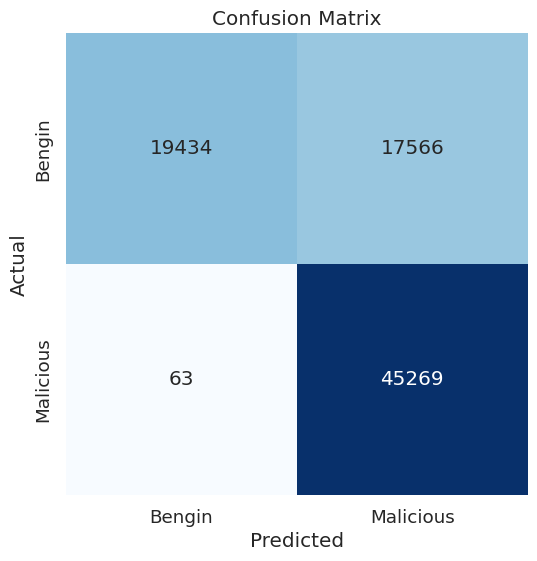

9 features, add feature dttl => accuracy: 0.7858791235485595
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.2328 - accuracy: 0.9197 - val_loss: 0.4569 - val_accuracy: 0.7857
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.2040 - accuracy: 0.9267 - val_loss: 0.4396 - val_accuracy: 0.7857
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1965 - accuracy: 0.9267 - val_loss: 0.4067 - val_accuracy: 0.7857
Epoch 4/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1903 - accuracy: 0.9266 - val_loss: 0.4054 - val_accuracy: 0.7859
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1870 - accuracy: 0.9267 - val_loss: 0.3962 - val_accuracy: 0.7859
Epoch 6/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1851 - accuracy: 0.9268 - val_loss: 0.39

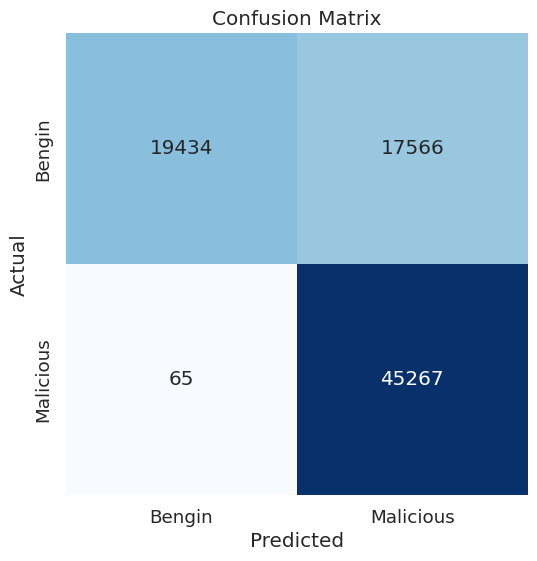

10 features, add feature proto_tcp => accuracy: 0.7858548316571928
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.2158 - accuracy: 0.9253 - val_loss: 0.4111 - val_accuracy: 0.8087
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1909 - accuracy: 0.9319 - val_loss: 0.3893 - val_accuracy: 0.8086
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1827 - accuracy: 0.9320 - val_loss: 0.3740 - val_accuracy: 0.8086
Epoch 4/10
1370/1370 [==============================] - 5s 3ms/step - loss: 0.1782 - accuracy: 0.9320 - val_loss: 0.3792 - val_accuracy: 0.8096
Epoch 5/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1760 - accuracy: 0.9319 - val_loss: 0.3601 - val_accuracy: 0.8091
Epoch 6/10
1370/1370 [==============================] - 5s 3ms/step - loss: 0.1747 - accuracy: 0.9320 - val_loss

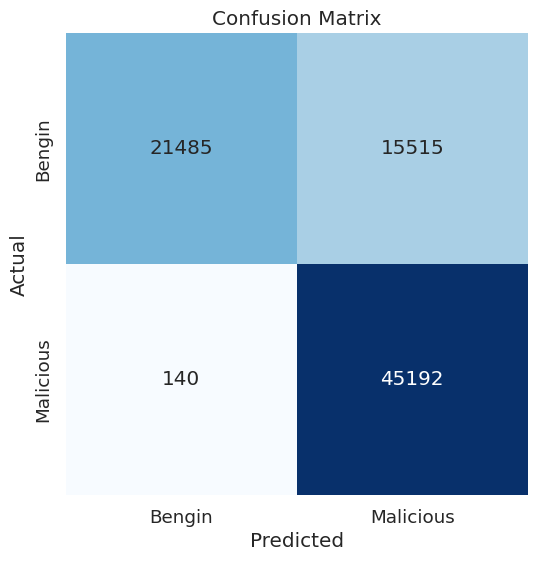

11 features, add feature state_FIN => accuracy: 0.8098552203274547
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.2188 - accuracy: 0.9224 - val_loss: 0.4069 - val_accuracy: 0.8088
Epoch 2/10
1370/1370 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9319 - val_loss: 0.3771 - val_accuracy: 0.8087
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1818 - accuracy: 0.9321 - val_loss: 0.3645 - val_accuracy: 0.8102
Epoch 4/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1767 - accuracy: 0.9321 - val_loss: 0.3557 - val_accuracy: 0.8109
Epoch 5/10
1370/1370 [==============================] - 5s 3ms/step - loss: 0.1722 - accuracy: 0.9323 - val_loss: 0.3424 - val_accuracy: 0.8100
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1685 - accuracy: 0.9322 - val_loss

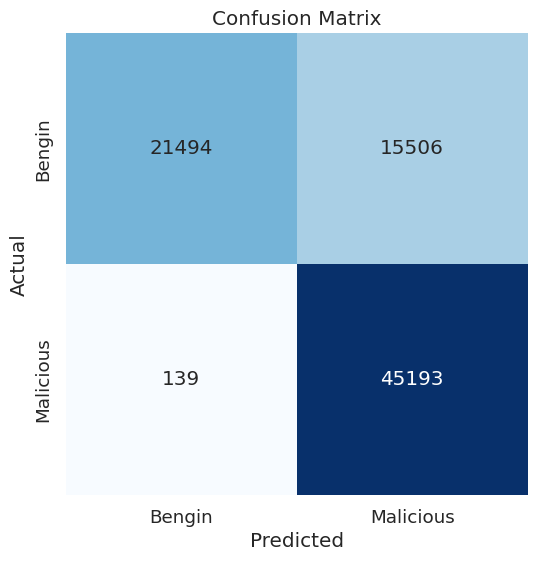

12 features, add feature dmean => accuracy: 0.809976679784288
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.2152 - accuracy: 0.9244 - val_loss: 0.3903 - val_accuracy: 0.8089
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1855 - accuracy: 0.9322 - val_loss: 0.3672 - val_accuracy: 0.8089
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1767 - accuracy: 0.9323 - val_loss: 0.3420 - val_accuracy: 0.8089
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1700 - accuracy: 0.9323 - val_loss: 0.3326 - val_accuracy: 0.8095
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1638 - accuracy: 0.9324 - val_loss: 0.3083 - val_accuracy: 0.8106
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1609 - accuracy: 0.9325 - val_loss: 0.3

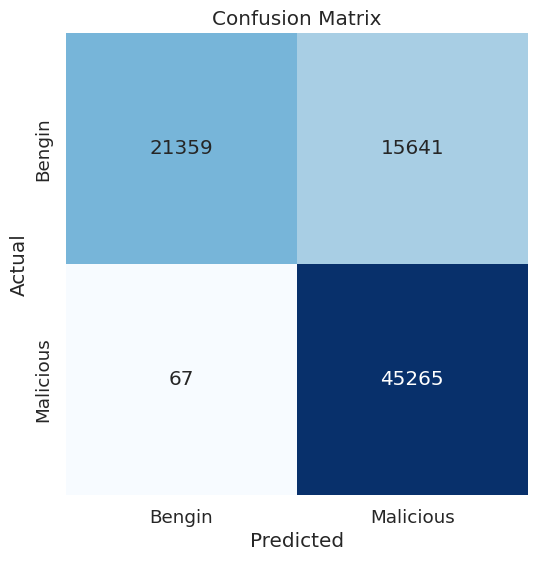

13 features, add feature smean => accuracy: 0.8092114852062382
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.2160 - accuracy: 0.9220 - val_loss: 0.3951 - val_accuracy: 0.8090
Epoch 2/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1854 - accuracy: 0.9322 - val_loss: 0.3704 - val_accuracy: 0.8089
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1776 - accuracy: 0.9322 - val_loss: 0.3433 - val_accuracy: 0.8103
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1706 - accuracy: 0.9322 - val_loss: 0.3367 - val_accuracy: 0.8152
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1653 - accuracy: 0.9325 - val_loss: 0.3221 - val_accuracy: 0.8104
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1621 - accuracy: 0.9323 - val_loss: 0.

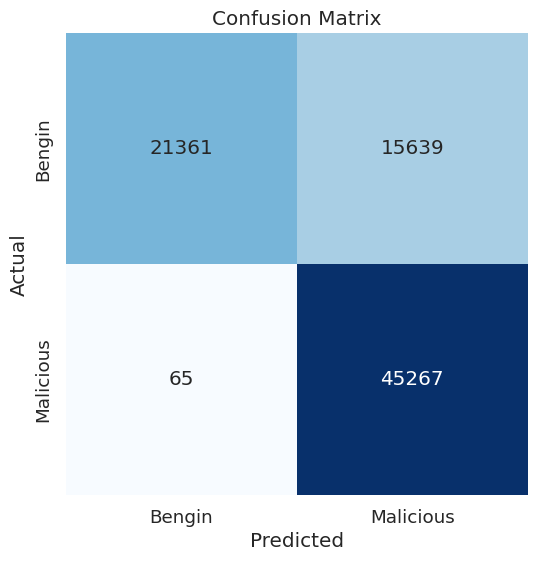

14 features, add feature state_INT => accuracy: 0.8092600689889715
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1983 - accuracy: 0.9268 - val_loss: 0.3493 - val_accuracy: 0.8167
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1574 - accuracy: 0.9328 - val_loss: 0.3095 - val_accuracy: 0.8155
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1501 - accuracy: 0.9334 - val_loss: 0.3110 - val_accuracy: 0.8129
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1454 - accuracy: 0.9341 - val_loss: 0.3019 - val_accuracy: 0.8291
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1407 - accuracy: 0.9347 - val_loss: 0.2882 - val_accuracy: 0.8463
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1384 - accuracy: 0.9345 - val_loss

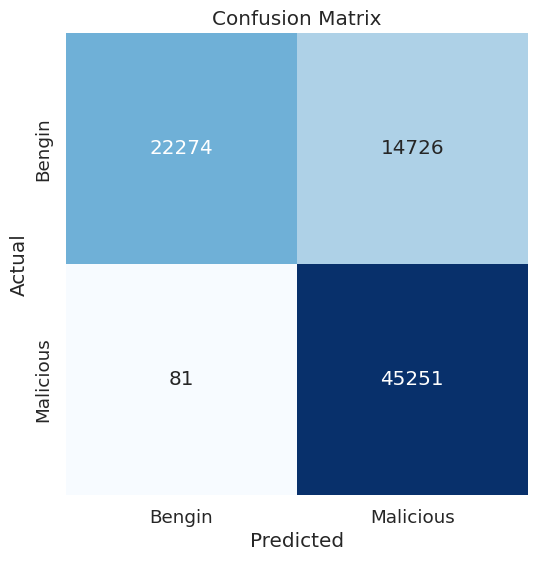

15 features, add feature ct_dst_src_ltm => accuracy: 0.8201549822669193
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.2030 - accuracy: 0.9230 - val_loss: 0.3720 - val_accuracy: 0.8196
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1578 - accuracy: 0.9332 - val_loss: 0.3027 - val_accuracy: 0.8166
Epoch 3/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1487 - accuracy: 0.9332 - val_loss: 0.3099 - val_accuracy: 0.8181
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1435 - accuracy: 0.9345 - val_loss: 0.3146 - val_accuracy: 0.8273
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1399 - accuracy: 0.9348 - val_loss: 0.2993 - val_accuracy: 0.8445
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1363 - accuracy: 0.9363 - val

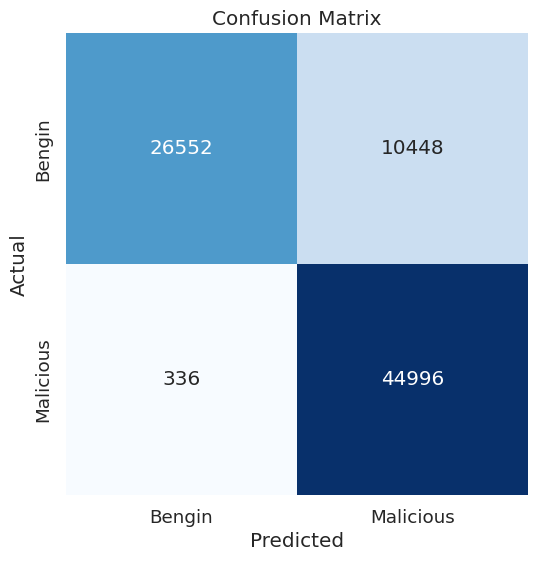

16 features, add feature ct_dst_ltm => accuracy: 0.8690181217509595
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1965 - accuracy: 0.9267 - val_loss: 0.3500 - val_accuracy: 0.8152
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1557 - accuracy: 0.9333 - val_loss: 0.2979 - val_accuracy: 0.8149
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1482 - accuracy: 0.9341 - val_loss: 0.2931 - val_accuracy: 0.8385
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1425 - accuracy: 0.9342 - val_loss: 0.2986 - val_accuracy: 0.8371
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1391 - accuracy: 0.9351 - val_loss: 0.2836 - val_accuracy: 0.8396
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1364 - accuracy: 0.9356 - val_los

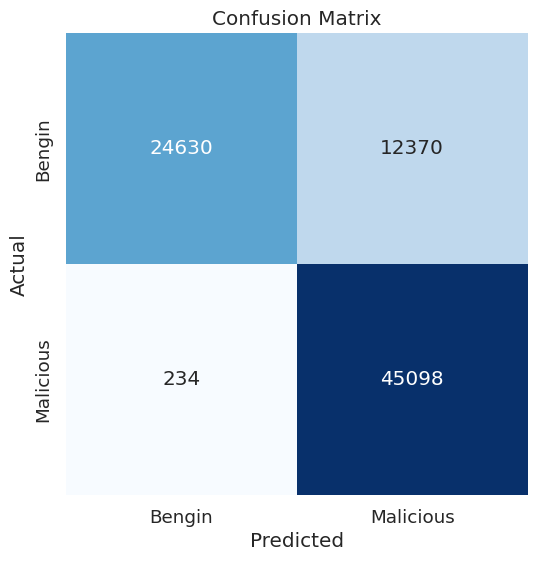

17 features, add feature ct_src_dport_ltm => accuracy: 0.8469125006072973
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1936 - accuracy: 0.9247 - val_loss: 0.3324 - val_accuracy: 0.8166
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1521 - accuracy: 0.9335 - val_loss: 0.2871 - val_accuracy: 0.8199
Epoch 3/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1463 - accuracy: 0.9337 - val_loss: 0.2861 - val_accuracy: 0.8169
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1420 - accuracy: 0.9342 - val_loss: 0.2892 - val_accuracy: 0.8343
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1386 - accuracy: 0.9352 - val_loss: 0.2913 - val_accuracy: 0.8315
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1361 - accuracy: 0.9357 - v

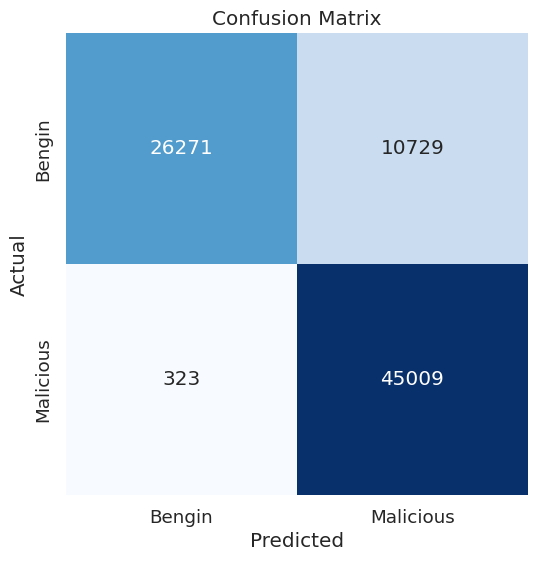

18 features, add feature ct_dst_sport_ltm => accuracy: 0.8657630083078268
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1932 - accuracy: 0.9253 - val_loss: 0.3318 - val_accuracy: 0.8181
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1523 - accuracy: 0.9343 - val_loss: 0.2917 - val_accuracy: 0.8152
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1445 - accuracy: 0.9344 - val_loss: 0.2921 - val_accuracy: 0.8358
Epoch 4/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1400 - accuracy: 0.9356 - val_loss: 0.2731 - val_accuracy: 0.8502
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1363 - accuracy: 0.9361 - val_loss: 0.2780 - val_accuracy: 0.8488
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1335 - accuracy: 0.9372 - v

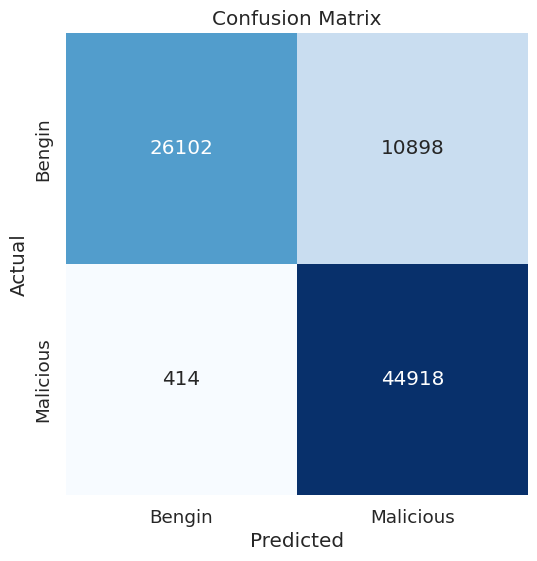

19 features, add feature service_- => accuracy: 0.8626050624301608
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1874 - accuracy: 0.9272 - val_loss: 0.3544 - val_accuracy: 0.8163
Epoch 2/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1494 - accuracy: 0.9346 - val_loss: 0.3045 - val_accuracy: 0.8164
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1422 - accuracy: 0.9354 - val_loss: 0.3041 - val_accuracy: 0.8294
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1371 - accuracy: 0.9365 - val_loss: 0.3173 - val_accuracy: 0.8390
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1337 - accuracy: 0.9374 - val_loss: 0.3004 - val_accuracy: 0.8496
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1312 - accuracy: 0.9381 - val_loss

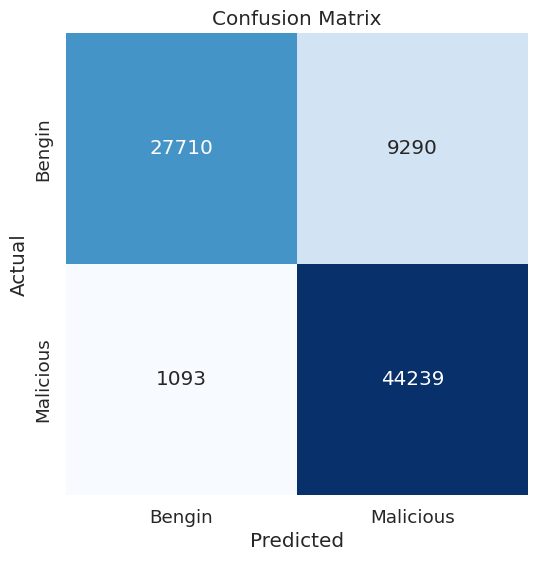

20 features, add feature ct_srv_dst => accuracy: 0.8738886459699752
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 9s 6ms/step - loss: 0.1796 - accuracy: 0.9257 - val_loss: 0.3316 - val_accuracy: 0.8181
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1456 - accuracy: 0.9349 - val_loss: 0.2895 - val_accuracy: 0.8224
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1393 - accuracy: 0.9357 - val_loss: 0.3022 - val_accuracy: 0.8306
Epoch 4/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1355 - accuracy: 0.9366 - val_loss: 0.2986 - val_accuracy: 0.8300
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1326 - accuracy: 0.9373 - val_loss: 0.2908 - val_accuracy: 0.8383
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1304 - accuracy: 0.9382 - val_los

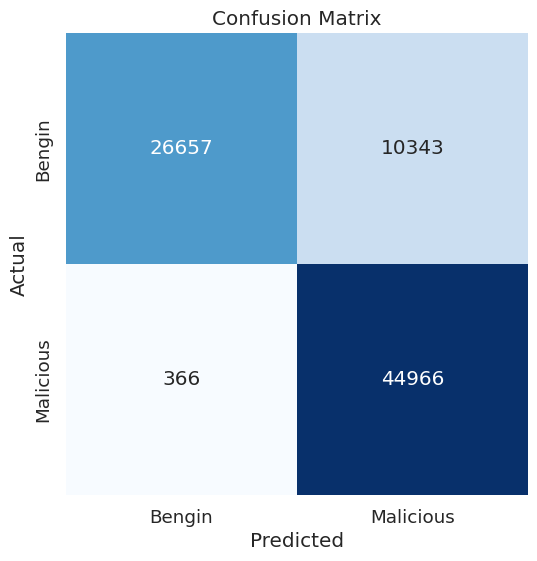

21 features, add feature proto_udp => accuracy: 0.8699290676772093
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1808 - accuracy: 0.9255 - val_loss: 0.3386 - val_accuracy: 0.8201
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1447 - accuracy: 0.9349 - val_loss: 0.2883 - val_accuracy: 0.8200
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1395 - accuracy: 0.9361 - val_loss: 0.2943 - val_accuracy: 0.8405
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1360 - accuracy: 0.9364 - val_loss: 0.2973 - val_accuracy: 0.8413
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1323 - accuracy: 0.9369 - val_loss: 0.2795 - val_accuracy: 0.8567
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1301 - accuracy: 0.9382 - val_loss

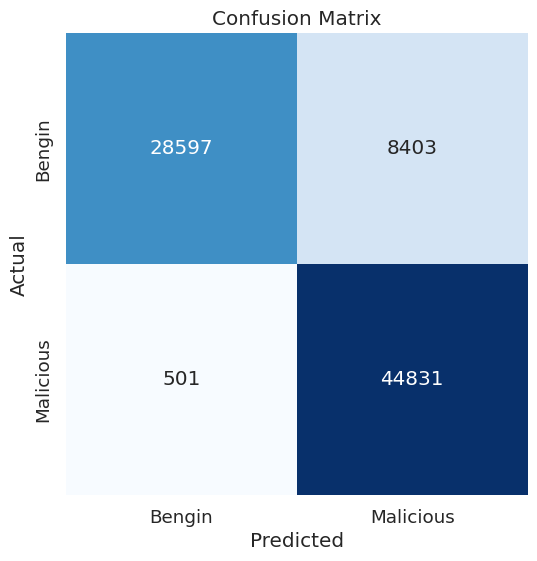

22 features, add feature djit => accuracy: 0.8918524996356216
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1827 - accuracy: 0.9236 - val_loss: 0.3436 - val_accuracy: 0.8163
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1449 - accuracy: 0.9345 - val_loss: 0.2947 - val_accuracy: 0.8164
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1384 - accuracy: 0.9353 - val_loss: 0.2899 - val_accuracy: 0.8280
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1353 - accuracy: 0.9362 - val_loss: 0.3135 - val_accuracy: 0.8252
Epoch 5/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1328 - accuracy: 0.9365 - val_loss: 0.2912 - val_accuracy: 0.8416
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1311 - accuracy: 0.9371 - val_loss: 0.2

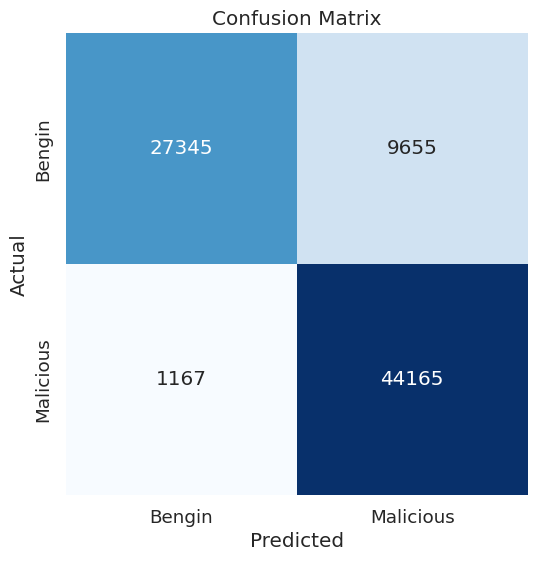

23 features, add feature ct_src_ltm => accuracy: 0.8685565758149929
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1781 - accuracy: 0.9260 - val_loss: 0.3479 - val_accuracy: 0.8163
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1443 - accuracy: 0.9352 - val_loss: 0.2843 - val_accuracy: 0.8233
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1394 - accuracy: 0.9360 - val_loss: 0.2941 - val_accuracy: 0.8347
Epoch 4/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1357 - accuracy: 0.9366 - val_loss: 0.2971 - val_accuracy: 0.8393
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1325 - accuracy: 0.9380 - val_loss: 0.2989 - val_accuracy: 0.8435
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1304 - accuracy: 0.9385 - val_los

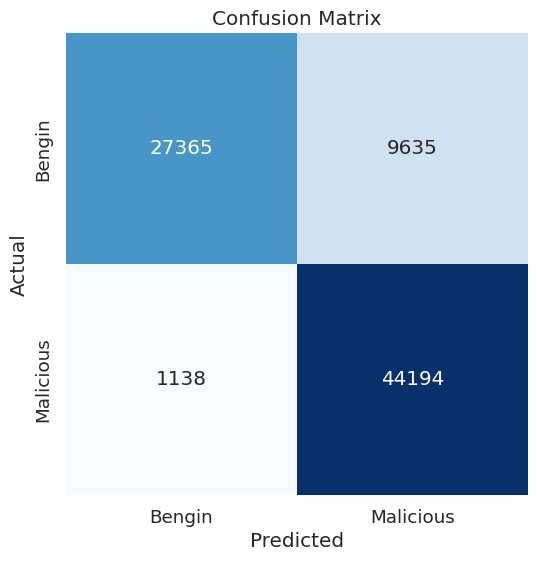

24 features, add feature ct_srv_src => accuracy: 0.8691517271534762
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1737 - accuracy: 0.9263 - val_loss: 0.3348 - val_accuracy: 0.8182
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1401 - accuracy: 0.9349 - val_loss: 0.2923 - val_accuracy: 0.8219
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1353 - accuracy: 0.9364 - val_loss: 0.2907 - val_accuracy: 0.8283
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1320 - accuracy: 0.9376 - val_loss: 0.3115 - val_accuracy: 0.8368
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1296 - accuracy: 0.9384 - val_loss: 0.2935 - val_accuracy: 0.8391
Epoch 6/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1270 - accuracy: 0.9390 - val_los

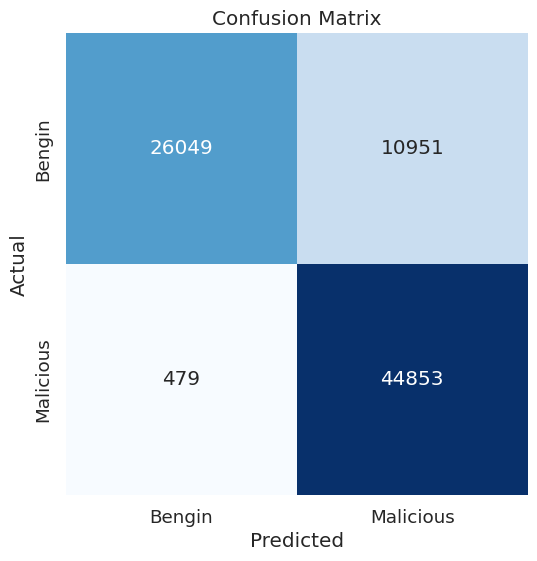

25 features, add feature sinpkt => accuracy: 0.8611718408395278
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1742 - accuracy: 0.9260 - val_loss: 0.3345 - val_accuracy: 0.8192
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1399 - accuracy: 0.9354 - val_loss: 0.2778 - val_accuracy: 0.8202
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1354 - accuracy: 0.9365 - val_loss: 0.2922 - val_accuracy: 0.8318
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1329 - accuracy: 0.9371 - val_loss: 0.3085 - val_accuracy: 0.8308
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1300 - accuracy: 0.9390 - val_loss: 0.2973 - val_accuracy: 0.8446
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1285 - accuracy: 0.9389 - val_loss: 0

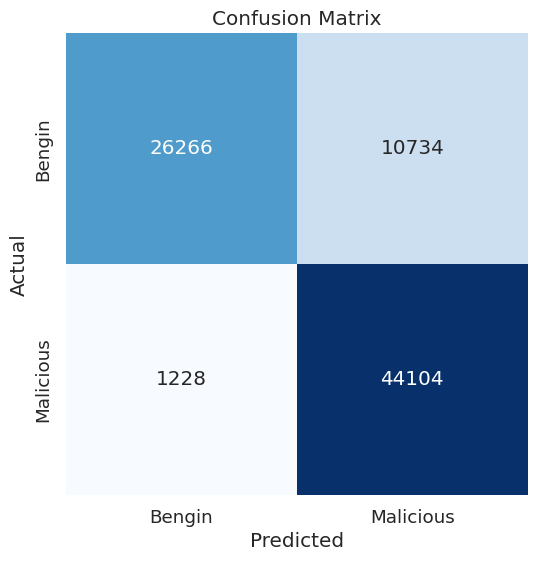

26 features, add feature service_dns => accuracy: 0.8547101977359958
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1742 - accuracy: 0.9260 - val_loss: 0.3375 - val_accuracy: 0.8168
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1397 - accuracy: 0.9353 - val_loss: 0.2884 - val_accuracy: 0.8198
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1352 - accuracy: 0.9365 - val_loss: 0.2933 - val_accuracy: 0.8269
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1319 - accuracy: 0.9369 - val_loss: 0.3126 - val_accuracy: 0.8331
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1298 - accuracy: 0.9371 - val_loss: 0.2912 - val_accuracy: 0.8361
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1279 - accuracy: 0.9382 - val_lo

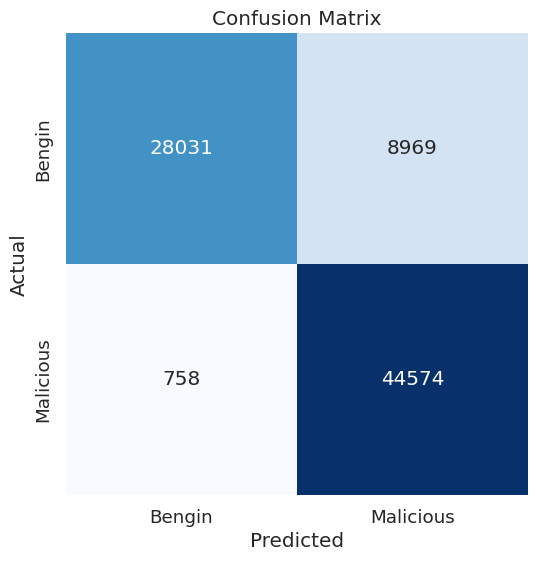

27 features, add feature dpkts => accuracy: 0.8818563863382403
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 9s 6ms/step - loss: 0.1752 - accuracy: 0.9248 - val_loss: 0.3404 - val_accuracy: 0.8153
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1398 - accuracy: 0.9357 - val_loss: 0.2861 - val_accuracy: 0.8208
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1346 - accuracy: 0.9362 - val_loss: 0.2956 - val_accuracy: 0.8264
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1322 - accuracy: 0.9370 - val_loss: 0.3003 - val_accuracy: 0.8362
Epoch 5/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1302 - accuracy: 0.9384 - val_loss: 0.2927 - val_accuracy: 0.8390
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1277 - accuracy: 0.9385 - val_loss: 0.

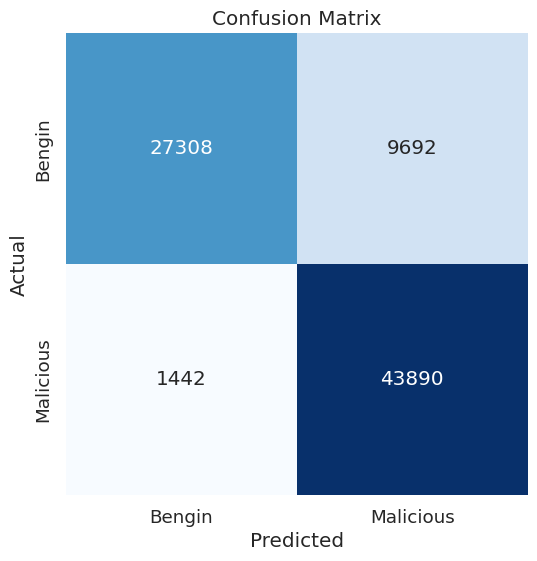

28 features, add feature sjit => accuracy: 0.8647670407617937
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1726 - accuracy: 0.9264 - val_loss: 0.3281 - val_accuracy: 0.8163
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1400 - accuracy: 0.9347 - val_loss: 0.2821 - val_accuracy: 0.8204
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1354 - accuracy: 0.9360 - val_loss: 0.3026 - val_accuracy: 0.8356
Epoch 4/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1319 - accuracy: 0.9366 - val_loss: 0.3089 - val_accuracy: 0.8374
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1297 - accuracy: 0.9376 - val_loss: 0.2931 - val_accuracy: 0.8445
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1281 - accuracy: 0.9381 - val_loss: 0.2

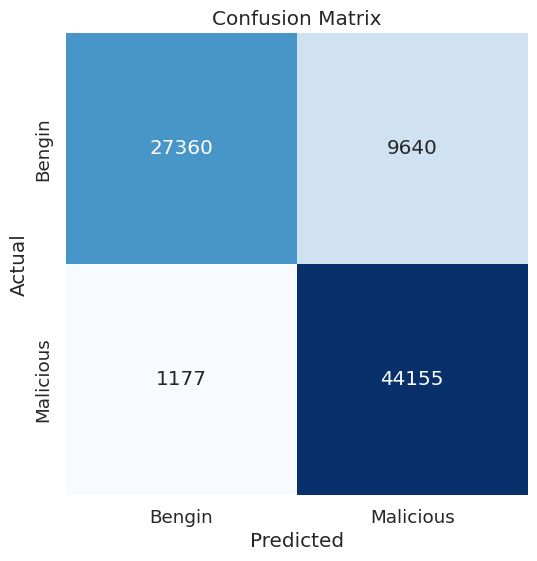

29 features, add feature dbytes => accuracy: 0.8686173055434097
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1747 - accuracy: 0.9251 - val_loss: 0.3407 - val_accuracy: 0.8183
Epoch 2/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1392 - accuracy: 0.9356 - val_loss: 0.2941 - val_accuracy: 0.8189
Epoch 3/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1343 - accuracy: 0.9366 - val_loss: 0.3008 - val_accuracy: 0.8229
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1320 - accuracy: 0.9371 - val_loss: 0.3005 - val_accuracy: 0.8306
Epoch 5/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1294 - accuracy: 0.9381 - val_loss: 0.2897 - val_accuracy: 0.8429
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1275 - accuracy: 0.9388 - val_loss: 0

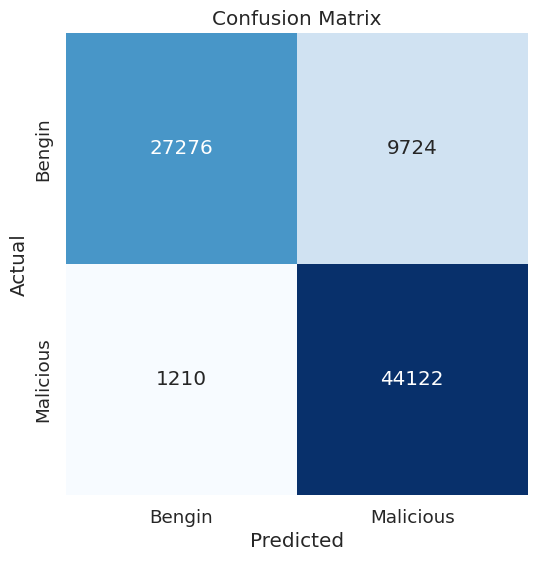

30 features, add feature ct_state_ttl => accuracy: 0.8671962298984599
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1742 - accuracy: 0.9258 - val_loss: 0.3267 - val_accuracy: 0.8193
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1389 - accuracy: 0.9356 - val_loss: 0.2833 - val_accuracy: 0.8220
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1340 - accuracy: 0.9365 - val_loss: 0.3006 - val_accuracy: 0.8284
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1313 - accuracy: 0.9373 - val_loss: 0.3052 - val_accuracy: 0.8402
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1290 - accuracy: 0.9384 - val_loss: 0.2918 - val_accuracy: 0.8405
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1268 - accuracy: 0.9389 - val_l

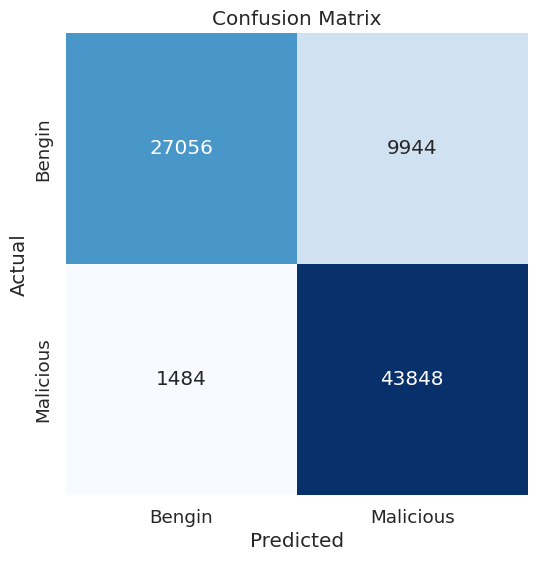

31 features, add feature spkts => accuracy: 0.8611961327308945
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1758 - accuracy: 0.9244 - val_loss: 0.3344 - val_accuracy: 0.8197
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1389 - accuracy: 0.9356 - val_loss: 0.2855 - val_accuracy: 0.8228
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1342 - accuracy: 0.9367 - val_loss: 0.2933 - val_accuracy: 0.8320
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1314 - accuracy: 0.9370 - val_loss: 0.2996 - val_accuracy: 0.8370
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1295 - accuracy: 0.9377 - val_loss: 0.2982 - val_accuracy: 0.8453
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1275 - accuracy: 0.9384 - val_loss: 0.

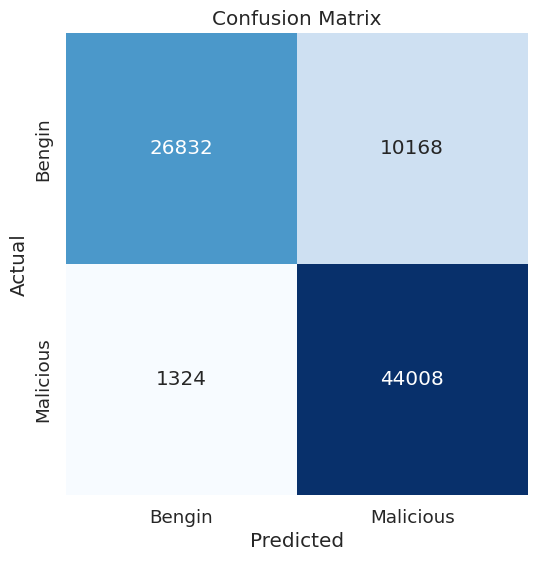

32 features, add feature sbytes => accuracy: 0.8604187922071612
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1744 - accuracy: 0.9255 - val_loss: 0.3309 - val_accuracy: 0.8171
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1387 - accuracy: 0.9356 - val_loss: 0.2880 - val_accuracy: 0.8138
Epoch 3/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1338 - accuracy: 0.9360 - val_loss: 0.2892 - val_accuracy: 0.8325
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1304 - accuracy: 0.9374 - val_loss: 0.3000 - val_accuracy: 0.8284
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1280 - accuracy: 0.9382 - val_loss: 0.2934 - val_accuracy: 0.8352
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1258 - accuracy: 0.9387 - val_loss: 0

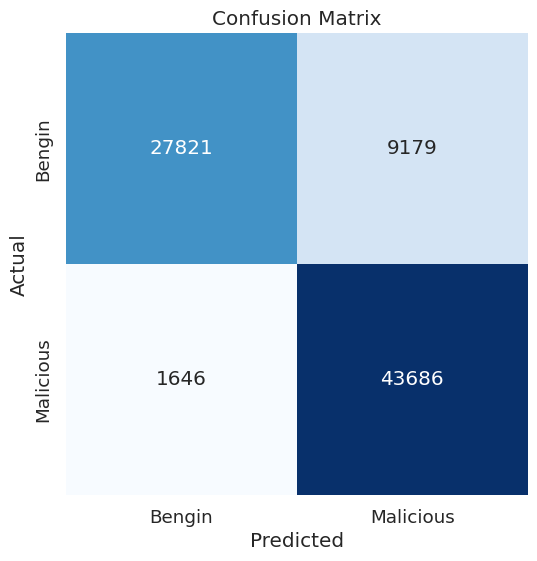

33 features, add feature dur => accuracy: 0.8685201379779429
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1751 - accuracy: 0.9258 - val_loss: 0.3316 - val_accuracy: 0.8157
Epoch 2/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1393 - accuracy: 0.9351 - val_loss: 0.2795 - val_accuracy: 0.8218
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1342 - accuracy: 0.9362 - val_loss: 0.2775 - val_accuracy: 0.8368
Epoch 4/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1308 - accuracy: 0.9375 - val_loss: 0.2903 - val_accuracy: 0.8343
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1287 - accuracy: 0.9381 - val_loss: 0.2819 - val_accuracy: 0.8416
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1272 - accuracy: 0.9387 - val_loss: 0.28

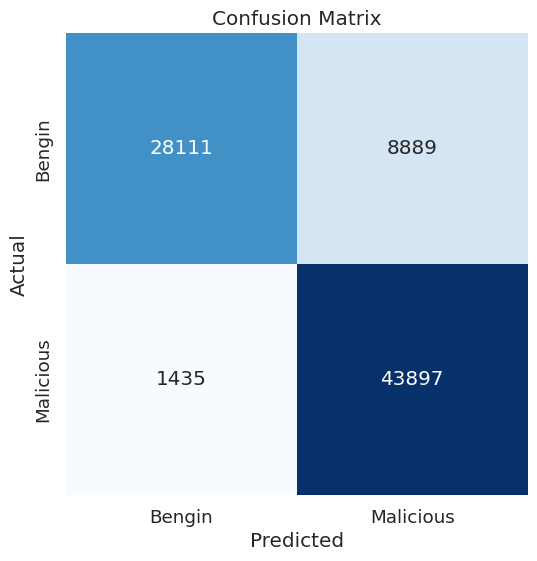

34 features, add feature dinpkt => accuracy: 0.8746052567652918
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 9s 5ms/step - loss: 0.1784 - accuracy: 0.9241 - val_loss: 0.3309 - val_accuracy: 0.8167
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1393 - accuracy: 0.9352 - val_loss: 0.2811 - val_accuracy: 0.8227
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1345 - accuracy: 0.9366 - val_loss: 0.2891 - val_accuracy: 0.8383
Epoch 4/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1312 - accuracy: 0.9373 - val_loss: 0.2949 - val_accuracy: 0.8328
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1291 - accuracy: 0.9381 - val_loss: 0.2864 - val_accuracy: 0.8476
Epoch 6/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1268 - accuracy: 0.9383 - val_loss: 0

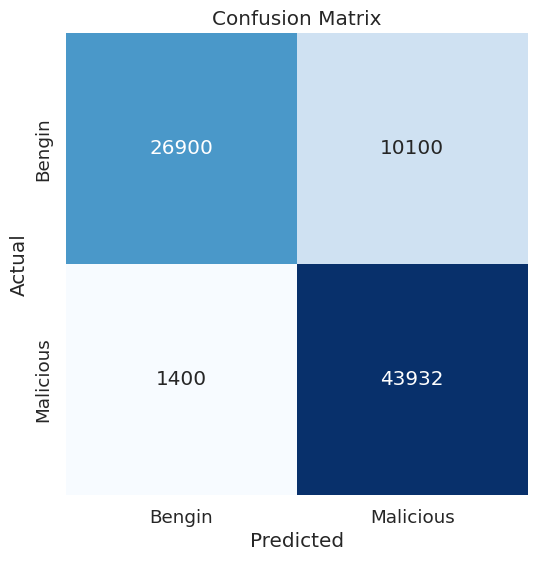

35 features, add feature dloss => accuracy: 0.8603216246416946
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 9s 5ms/step - loss: 0.1765 - accuracy: 0.9251 - val_loss: 0.3343 - val_accuracy: 0.8157
Epoch 2/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1399 - accuracy: 0.9355 - val_loss: 0.2840 - val_accuracy: 0.8231
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1344 - accuracy: 0.9368 - val_loss: 0.2879 - val_accuracy: 0.8375
Epoch 4/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1304 - accuracy: 0.9379 - val_loss: 0.3112 - val_accuracy: 0.8309
Epoch 5/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1282 - accuracy: 0.9386 - val_loss: 0.2948 - val_accuracy: 0.8439
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1261 - accuracy: 0.9396 - val_loss: 0.

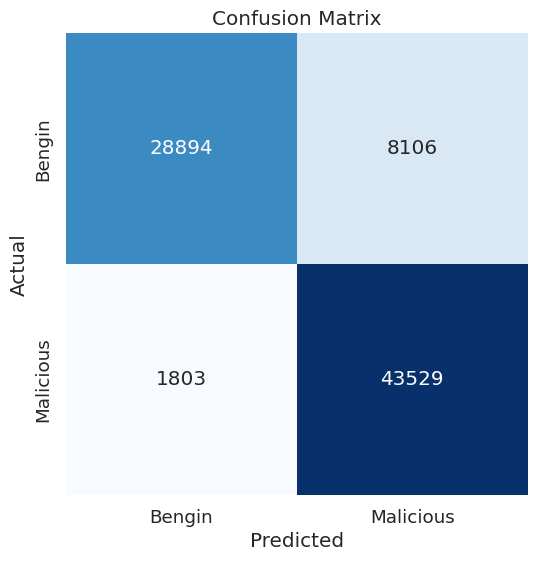

36 features, add feature response_body_len => accuracy: 0.879645824223874
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 4ms/step - loss: 0.1754 - accuracy: 0.9242 - val_loss: 0.3075 - val_accuracy: 0.8220
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1355 - accuracy: 0.9360 - val_loss: 0.2672 - val_accuracy: 0.8267
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1308 - accuracy: 0.9373 - val_loss: 0.2629 - val_accuracy: 0.8407
Epoch 4/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1275 - accuracy: 0.9379 - val_loss: 0.2743 - val_accuracy: 0.8341
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1257 - accuracy: 0.9385 - val_loss: 0.2677 - val_accuracy: 0.8471
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1238 - accuracy: 0.9395 - v

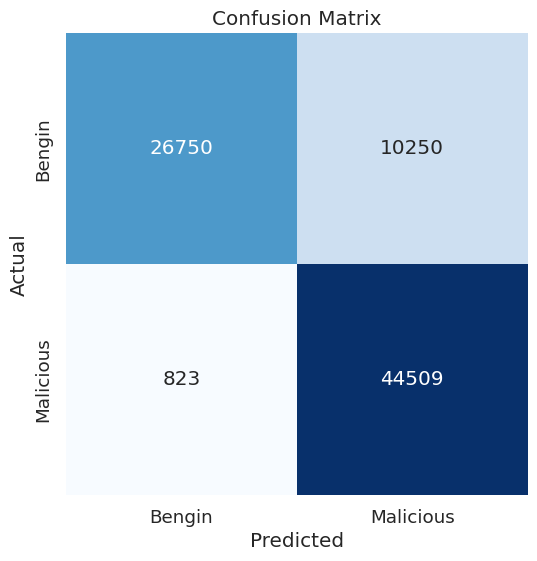

37 features, add feature service_http => accuracy: 0.8655079434484769
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1682 - accuracy: 0.9272 - val_loss: 0.3128 - val_accuracy: 0.8222
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1344 - accuracy: 0.9359 - val_loss: 0.2677 - val_accuracy: 0.8244
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1300 - accuracy: 0.9370 - val_loss: 0.2787 - val_accuracy: 0.8314
Epoch 4/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1272 - accuracy: 0.9373 - val_loss: 0.2843 - val_accuracy: 0.8306
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1252 - accuracy: 0.9390 - val_loss: 0.2631 - val_accuracy: 0.8537
Epoch 6/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1234 - accuracy: 0.9391 - val_l

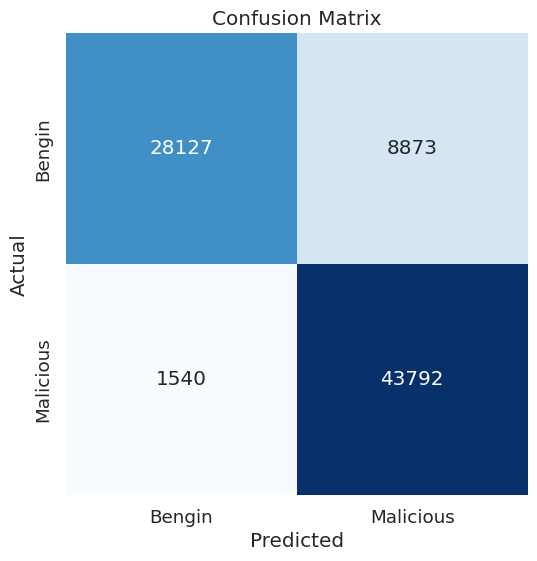

38 features, add feature ct_flw_http_mthd => accuracy: 0.8735242675994753
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1705 - accuracy: 0.9262 - val_loss: 0.2922 - val_accuracy: 0.8178
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1330 - accuracy: 0.9359 - val_loss: 0.2578 - val_accuracy: 0.8216
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1282 - accuracy: 0.9370 - val_loss: 0.2614 - val_accuracy: 0.8307
Epoch 4/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1251 - accuracy: 0.9389 - val_loss: 0.2674 - val_accuracy: 0.8386
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1230 - accuracy: 0.9402 - val_loss: 0.2711 - val_accuracy: 0.8494
Epoch 6/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1217 - accuracy: 0.9396 - v

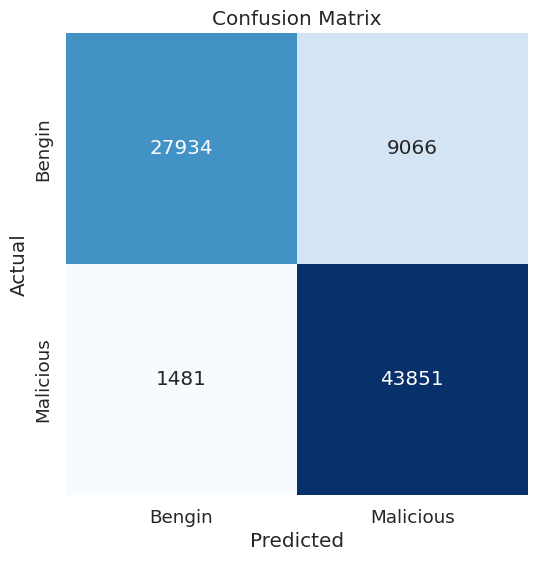

39 features, add feature tcprtt => accuracy: 0.871896710877909
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 9s 5ms/step - loss: 0.1685 - accuracy: 0.9272 - val_loss: 0.2975 - val_accuracy: 0.8186
Epoch 2/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1330 - accuracy: 0.9358 - val_loss: 0.2597 - val_accuracy: 0.8231
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1287 - accuracy: 0.9370 - val_loss: 0.2670 - val_accuracy: 0.8380
Epoch 4/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1262 - accuracy: 0.9375 - val_loss: 0.2889 - val_accuracy: 0.8362
Epoch 5/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1241 - accuracy: 0.9379 - val_loss: 0.2694 - val_accuracy: 0.8424
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1227 - accuracy: 0.9383 - val_loss: 0.

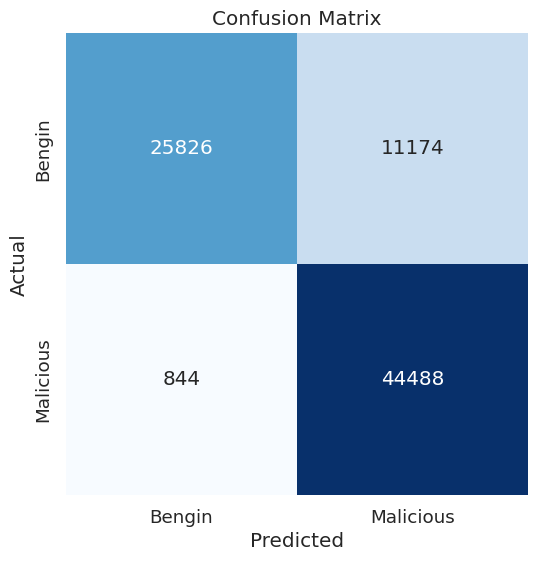

40 features, add feature trans_depth => accuracy: 0.8540300247777292
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1708 - accuracy: 0.9258 - val_loss: 0.2959 - val_accuracy: 0.8202
Epoch 2/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1322 - accuracy: 0.9367 - val_loss: 0.2591 - val_accuracy: 0.8353
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1281 - accuracy: 0.9369 - val_loss: 0.2646 - val_accuracy: 0.8446
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1254 - accuracy: 0.9380 - val_loss: 0.2846 - val_accuracy: 0.8324
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1243 - accuracy: 0.9384 - val_loss: 0.2757 - val_accuracy: 0.8440
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1224 - accuracy: 0.9391 - val_lo

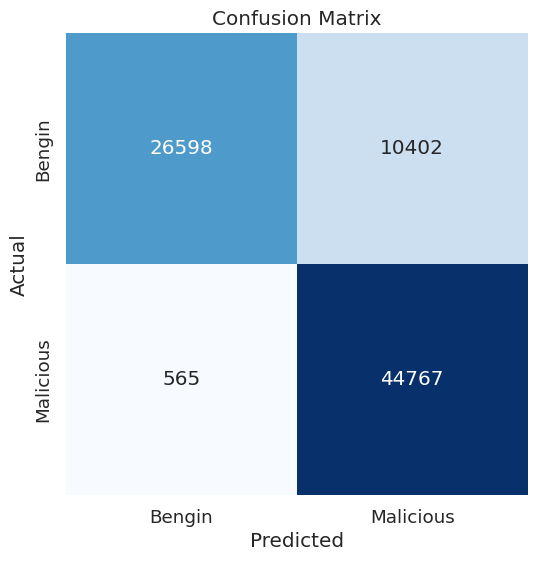

41 features, add feature state_CON => accuracy: 0.86679541369091
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1679 - accuracy: 0.9265 - val_loss: 0.2912 - val_accuracy: 0.8250
Epoch 2/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1320 - accuracy: 0.9361 - val_loss: 0.2585 - val_accuracy: 0.8278
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1282 - accuracy: 0.9372 - val_loss: 0.2674 - val_accuracy: 0.8408
Epoch 4/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1256 - accuracy: 0.9389 - val_loss: 0.2744 - val_accuracy: 0.8388
Epoch 5/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1239 - accuracy: 0.9392 - val_loss: 0.2685 - val_accuracy: 0.8536
Epoch 6/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1220 - accuracy: 0.9394 - val_loss: 

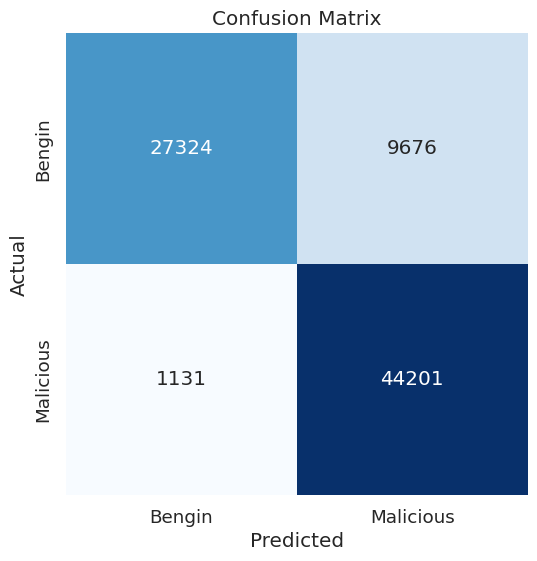

42 features, add feature proto_unas => accuracy: 0.8687387650002429
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1731 - accuracy: 0.9243 - val_loss: 0.2999 - val_accuracy: 0.8218
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1320 - accuracy: 0.9363 - val_loss: 0.2561 - val_accuracy: 0.8272
Epoch 3/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1274 - accuracy: 0.9378 - val_loss: 0.2673 - val_accuracy: 0.8398
Epoch 4/10
1370/1370 [==============================] - 5s 4ms/step - loss: 0.1254 - accuracy: 0.9384 - val_loss: 0.2887 - val_accuracy: 0.8418
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1232 - accuracy: 0.9394 - val_loss: 0.2772 - val_accuracy: 0.8490
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1218 - accuracy: 0.9400 - val_los

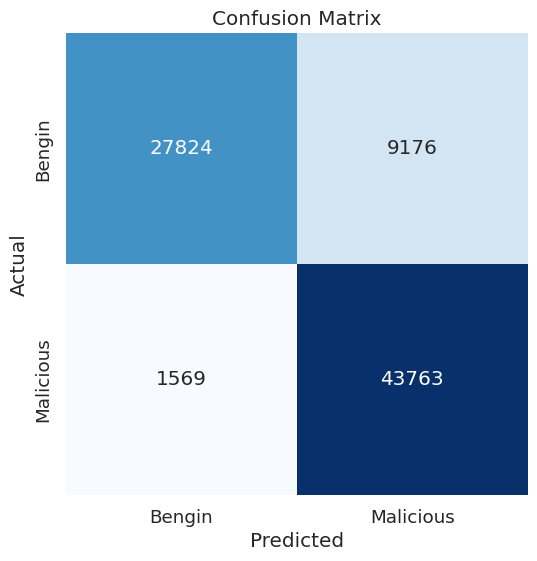

43 features, add feature ackdat => accuracy: 0.8694918136326094
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1733 - accuracy: 0.9250 - val_loss: 0.2856 - val_accuracy: 0.8187
Epoch 2/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1327 - accuracy: 0.9358 - val_loss: 0.2650 - val_accuracy: 0.8269
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1284 - accuracy: 0.9372 - val_loss: 0.2647 - val_accuracy: 0.8407
Epoch 4/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1259 - accuracy: 0.9381 - val_loss: 0.2889 - val_accuracy: 0.8361
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1241 - accuracy: 0.9380 - val_loss: 0.2666 - val_accuracy: 0.8379
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1220 - accuracy: 0.9393 - val_loss: 0

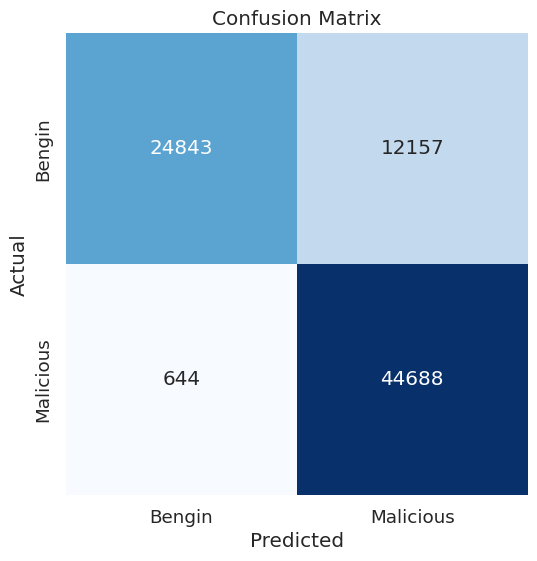

44 features, add feature sloss => accuracy: 0.8445197493076811
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1672 - accuracy: 0.9265 - val_loss: 0.3014 - val_accuracy: 0.8207
Epoch 2/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1316 - accuracy: 0.9359 - val_loss: 0.2547 - val_accuracy: 0.8224
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1273 - accuracy: 0.9374 - val_loss: 0.2734 - val_accuracy: 0.8313
Epoch 4/10
1370/1370 [==============================] - 9s 7ms/step - loss: 0.1253 - accuracy: 0.9381 - val_loss: 0.2905 - val_accuracy: 0.8359
Epoch 5/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1235 - accuracy: 0.9392 - val_loss: 0.2647 - val_accuracy: 0.8509
Epoch 6/10
1370/1370 [==============================] - 9s 7ms/step - loss: 0.1218 - accuracy: 0.9395 - val_loss: 0.

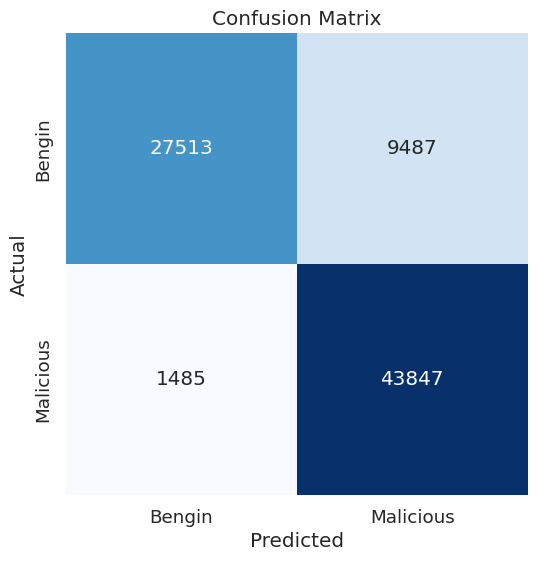

45 features, add feature service_smtp => accuracy: 0.8667346839624933
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 9s 6ms/step - loss: 0.1694 - accuracy: 0.9249 - val_loss: 0.3046 - val_accuracy: 0.8188
Epoch 2/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1318 - accuracy: 0.9354 - val_loss: 0.2535 - val_accuracy: 0.8227
Epoch 3/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1277 - accuracy: 0.9363 - val_loss: 0.2728 - val_accuracy: 0.8339
Epoch 4/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1255 - accuracy: 0.9380 - val_loss: 0.2797 - val_accuracy: 0.8398
Epoch 5/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1235 - accuracy: 0.9382 - val_loss: 0.2758 - val_accuracy: 0.8470
Epoch 6/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1222 - accuracy: 0.9388 - val_l

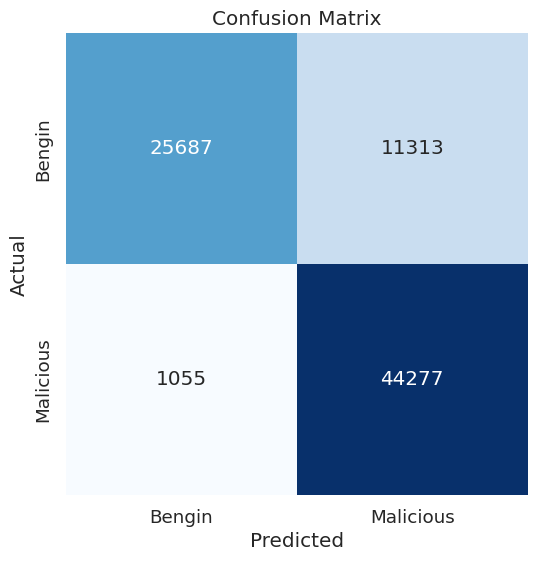

46 features, add feature synack => accuracy: 0.8497789437885633
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1719 - accuracy: 0.9233 - val_loss: 0.2889 - val_accuracy: 0.8171
Epoch 2/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1316 - accuracy: 0.9356 - val_loss: 0.2505 - val_accuracy: 0.8210
Epoch 3/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1276 - accuracy: 0.9372 - val_loss: 0.2672 - val_accuracy: 0.8349
Epoch 4/10
1370/1370 [==============================] - 8s 5ms/step - loss: 0.1249 - accuracy: 0.9379 - val_loss: 0.2842 - val_accuracy: 0.8308
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1233 - accuracy: 0.9385 - val_loss: 0.2718 - val_accuracy: 0.8520
Epoch 6/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1223 - accuracy: 0.9390 - val_loss: 0

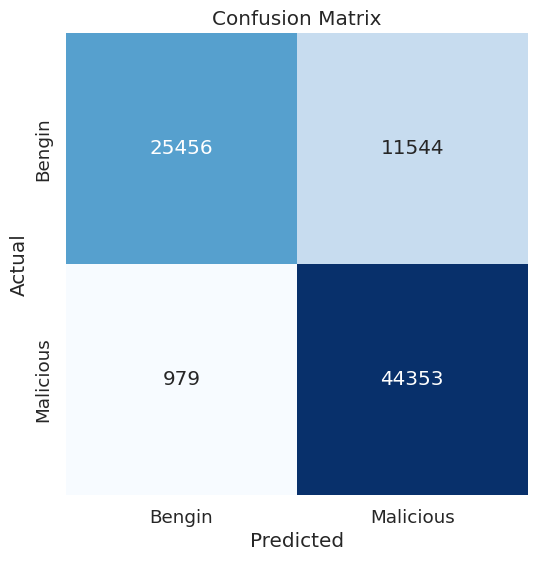

47 features, add feature service_ftp-data => accuracy: 0.8478963222076471
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 4ms/step - loss: 0.1675 - accuracy: 0.9268 - val_loss: 0.3011 - val_accuracy: 0.8210
Epoch 2/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1304 - accuracy: 0.9364 - val_loss: 0.2547 - val_accuracy: 0.8348
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1276 - accuracy: 0.9375 - val_loss: 0.2629 - val_accuracy: 0.8401
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1241 - accuracy: 0.9389 - val_loss: 0.2776 - val_accuracy: 0.8441
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1227 - accuracy: 0.9392 - val_loss: 0.2713 - val_accuracy: 0.8381
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1216 - accuracy: 0.9398 - v

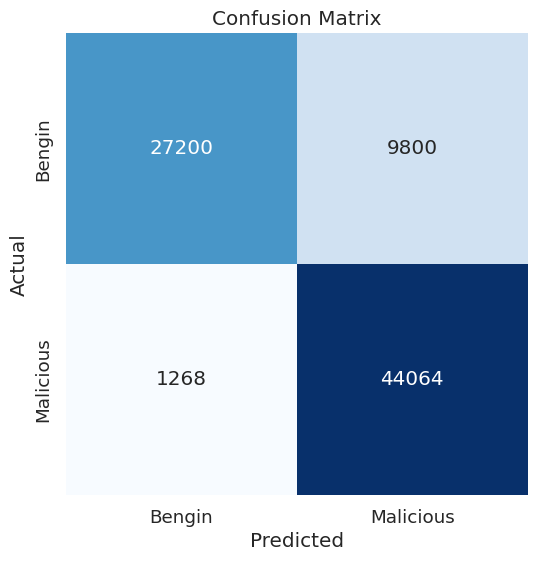

48 features, add feature service_ftp => accuracy: 0.8655686731768936
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1650 - accuracy: 0.9270 - val_loss: 0.2974 - val_accuracy: 0.8193
Epoch 2/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1290 - accuracy: 0.9381 - val_loss: 0.2475 - val_accuracy: 0.8413
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1245 - accuracy: 0.9392 - val_loss: 0.2697 - val_accuracy: 0.8399
Epoch 4/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1226 - accuracy: 0.9400 - val_loss: 0.2788 - val_accuracy: 0.8370
Epoch 5/10
1370/1370 [==============================] - 6s 5ms/step - loss: 0.1203 - accuracy: 0.9406 - val_loss: 0.2708 - val_accuracy: 0.8502
Epoch 6/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1194 - accuracy: 0.9410 - val_lo

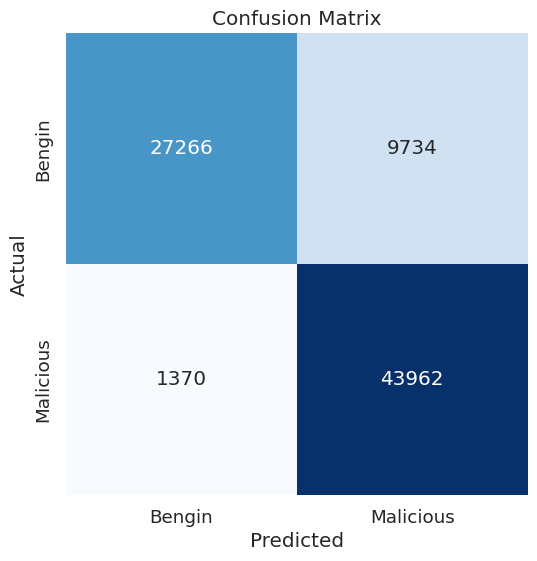

49 features, add feature proto_arp => accuracy: 0.8651314191322936
----------------------------------------------------------------------------------------------------
Epoch 1/10
1370/1370 [==============================] - 7s 5ms/step - loss: 0.1702 - accuracy: 0.9249 - val_loss: 0.2932 - val_accuracy: 0.8200
Epoch 2/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1299 - accuracy: 0.9372 - val_loss: 0.2602 - val_accuracy: 0.8310
Epoch 3/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1261 - accuracy: 0.9387 - val_loss: 0.2646 - val_accuracy: 0.8399
Epoch 4/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1233 - accuracy: 0.9398 - val_loss: 0.2880 - val_accuracy: 0.8334
Epoch 5/10
1370/1370 [==============================] - 6s 4ms/step - loss: 0.1218 - accuracy: 0.9402 - val_loss: 0.2769 - val_accuracy: 0.8419
Epoch 6/10
1370/1370 [==============================] - 8s 6ms/step - loss: 0.1201 - accuracy: 0.9405 - val_loss

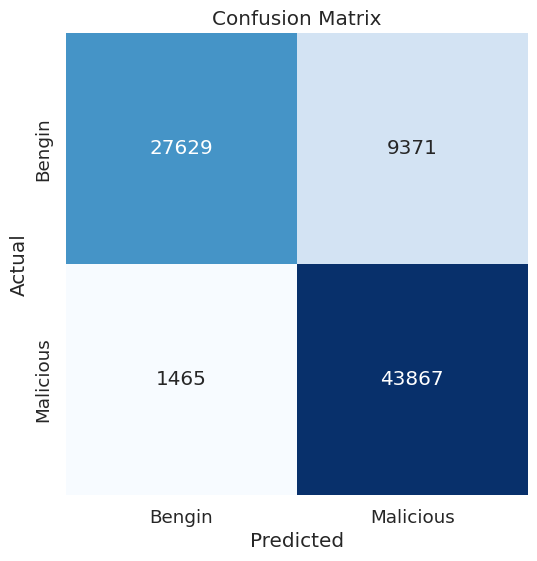

50 features, add feature state_REQ => accuracy: 0.8683865325754263
----------------------------------------------------------------------------------------------------
Using 1 features: Accuracy = 0.5506000097167566
Using 2 features: Accuracy = 0.6862580770538794
Using 3 features: Accuracy = 0.7373317786522858
Using 4 features: Accuracy = 0.7604090754506145
Using 5 features: Accuracy = 0.7600689889714813
Using 6 features: Accuracy = 0.761818005149881
Using 7 features: Accuracy = 0.7855025992323762
Using 8 features: Accuracy = 0.7860491667881261
Using 9 features: Accuracy = 0.7858791235485595
Using 10 features: Accuracy = 0.7858548316571928
Using 11 features: Accuracy = 0.8098552203274547
Using 12 features: Accuracy = 0.809976679784288
Using 13 features: Accuracy = 0.8092114852062382
Using 14 features: Accuracy = 0.8092600689889715
Using 15 features: Accuracy = 0.8201549822669193
Using 16 features: Accuracy = 0.8690181217509595
Using 17 features: Accuracy = 0.8469125006072973
Using 18 f

In [53]:
accuracy_results = []
accuracy_list = []
train_list = []

cnt = 50
idx = 0

while cnt > 0:

  train_list.append(top_features.pop(0))
  X_train_copy = X_train[train_list]
  X_test_copy = X_test[train_list]

  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(len(train_list),)))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model.fit(X_train_copy, y_train, epochs=10, batch_size=128, validation_data=(X_test_copy, y_test))
  y_pred = model.predict(X_test_copy)

  accuracy = evaluate_classification_with_plot(y_test, y_pred, class_names=['Bengin', 'Malicious'])
  accuracy_results.append((len(train_list), accuracy))
  accuracy_list.append(accuracy)

  cnt-=1
  print(f"{len(train_list)} features, add feature {train_list[idx]} => accuracy: {accuracy}")
  idx+=1
  print("-"*100)

for top_rank, accuracy in accuracy_results:
    print(f"Using {top_rank} features: Accuracy = {accuracy}")

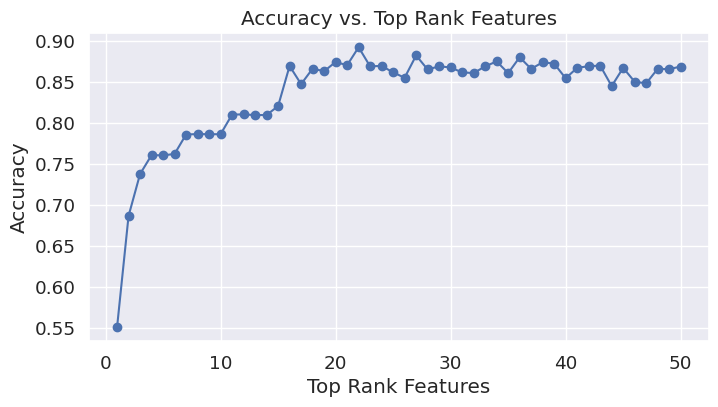

In [54]:
import matplotlib.pyplot as plt

top_rank_values = [top_rank for top_rank, accuracy in accuracy_results]
accuracy_values = [accuracy for top_rank, accuracy in accuracy_results]


plt.plot(top_rank_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Top Rank Features')
plt.xlabel('Top Rank Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [134]:
top_features = []
check_pass = 0
max_value = max(accuracy_list)
print(f"The maximum accuracy is: {max_value}")

for top_rank, accuracy in accuracy_results:
    if accuracy == max_value:
      print(f"{top_rank} features give the hightest accuracy")
      check_pass = 1
      top_features.append(train_list[top_rank-1])
      break
    if check_pass == 0:
      top_features.append(train_list[top_rank-1])

print(top_features)


The maximum accuracy is: 0.8918524996356216
22 features give the hightest accuracy
['stcpb', 'dtcpb', 'rate', 'swin', 'dwin', 'sload', 'sttl', 'dload', 'dttl', 'proto_tcp', 'state_FIN', 'dmean', 'smean', 'state_INT', 'ct_dst_src_ltm', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'service_-', 'ct_srv_dst', 'proto_udp', 'djit']
